In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataaset

dataset = pd.read_csv('personen_datensatz.csv', delimiter=';')  # Verwenden Sie den richtigen Pfad zur Datei
dataset.head()

,Person Nr.,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe,Einkommen
0,1,72.0,170.0,80,M.Eng.,blau,65k
1,2,25.0,197.0,107,B.A.,schwarz,65k
2,3,46.0,193.0,103,B.Sc.,NaN,65k
3,4,59.0,160.0,70,NaN,schwarz,30k
4,5,50.0,198.0,108,M.Sc.,gruen,60k


# Statiscs about the Dataset

In [3]:
dataset_count = dataset.count()
# Check for missing values
missing_vlaues_count = dataset.isnull().sum()
# Check for duplicates
duplicated_values_count = dataset.duplicated().sum()
# Check data types
data_typs = dataset.dtypes
print("Dataset Count:\n", dataset_count)
print("\nMissing Values Count:\n", missing_vlaues_count)
print("\nDuplicated Values Count:\n", duplicated_values_count)
print("\nData Types:\n", data_typs)

# Dataset description
dataset_description = dataset.describe()
print("\nDataset Description:\n", dataset_description)

# information about the non-numerical columns
non_numerical_info = dataset.select_dtypes(include=['object']).describe()
print("\nNon-Numerical Columns Information:\n", non_numerical_info)

Dataset Count:
 Person Nr.      1000
Alter            982
Groesse (cm)     985
Gewicht (kg)    1000
Abschluss        862
Augenfarbe       788
Einkommen        876
dtype: int64

Missing Values Count:
 Person Nr.        0
Alter            18
Groesse (cm)     15
Gewicht (kg)      0
Abschluss       138
Augenfarbe      212
Einkommen       124
dtype: int64

Duplicated Values Count:
 0

Data Types:
 Person Nr.        int64
Alter           float64
Groesse (cm)    float64
Gewicht (kg)      int64
Abschluss        object
Augenfarbe       object
Einkommen        object
dtype: object

Dataset Description:
         Person Nr.       Alter  Groesse (cm)  Gewicht (kg)
count  1000.000000  982.000000    985.000000   1000.000000
mean    500.500000   58.990835    179.894416     89.897000
std     288.819436   23.834182     18.054035     18.007461
min       1.000000   18.000000    150.000000     60.000000
25%     250.750000   39.000000    164.000000     74.000000
50%     500.500000   59.000000    179.000000 

# Visualaisation

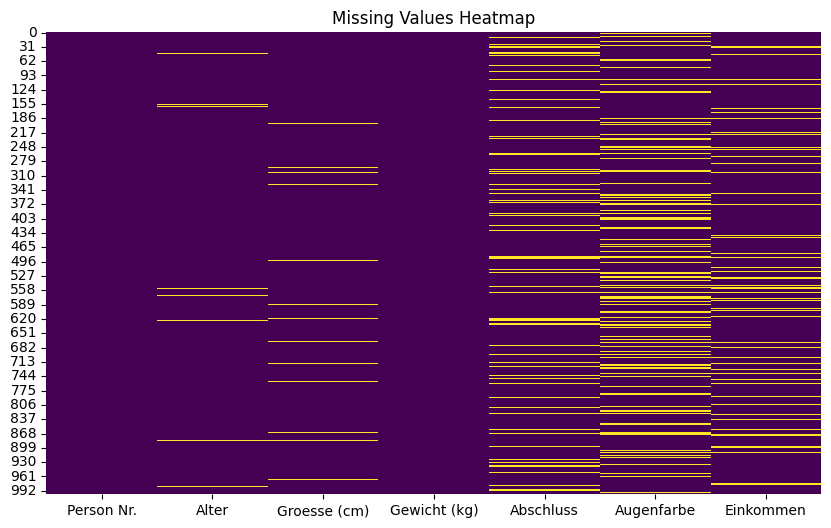

In [4]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


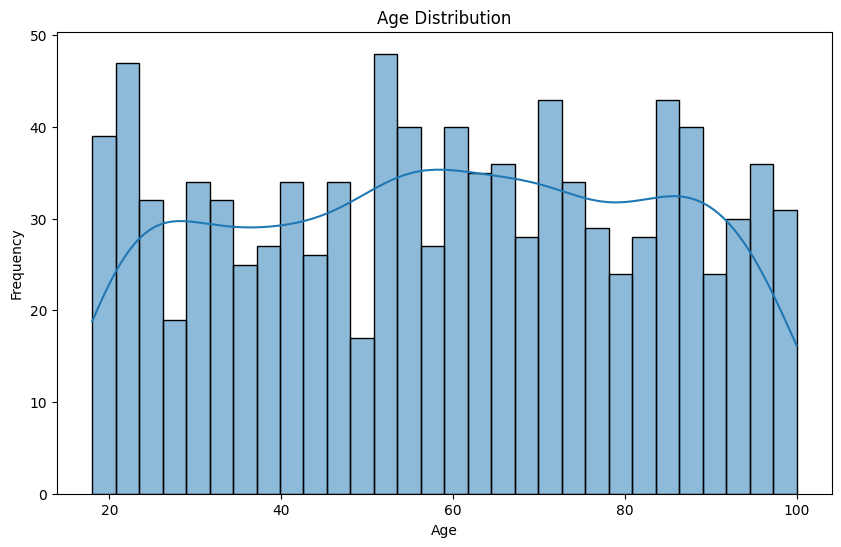

In [5]:
# Visualize the distribution of a specific column
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Alter'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


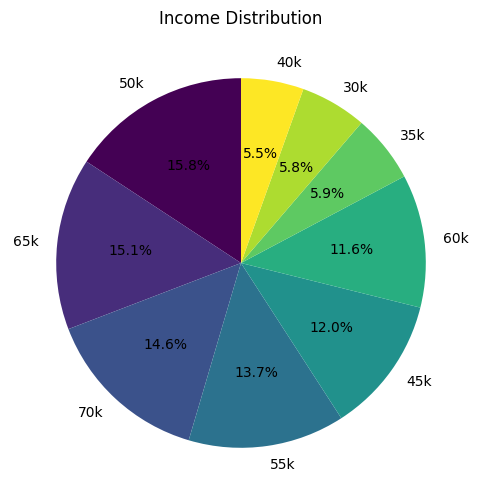

In [6]:
# Pie chart for income distribution
income_counts = dataset['Einkommen'].value_counts()
plt.figure(figsize=(10, 6))
income_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Income Distribution')
plt.ylabel('')  # Remove y-axis label for better appearance
plt.show()

In [7]:
# check the uniqe values of each categorical feature
categorical_columns = ['Abschluss', 'Augenfarbe', 'Einkommen']
for column in categorical_columns:
    unique_values = dataset[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Abschluss': ['M.Eng.' 'B.A.' 'B.Sc.' nan 'M.Sc.' 'M.A.' 'B.Eng.']
Unique values in 'Augenfarbe': ['blau' 'schwarz' nan 'gruen' 'braun']
Unique values in 'Einkommen': ['65k' '30k' '60k' '50k' nan '55k' '45k' '40k' '35k' '70k']


# Data Preprocessing

## Data Transformation

In [8]:
dataset.head()
# remove personen Nr. column
dataset = dataset.drop(columns=['Person Nr.'])

In [9]:
# Handle missing values in numerical columns using SimpleImputer
from sklearn.impute import SimpleImputer

# Define the imputer for numerical columns
numerical_columns = dataset.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')

# Fit and transform the numerical columns
dataset[numerical_columns] = imputer.fit_transform(dataset[numerical_columns])

# Check if missing values are handled
print(dataset[numerical_columns].isnull().sum())

Alter           0
Groesse (cm)    0
Gewicht (kg)    0
dtype: int64


In [10]:
# Handle missing values in categorical columns using SimpleImputer
from sklearn.impute import SimpleImputer

# Define the imputer for categorical columns (using the most frequent strategy)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the categorical columns
dataset[categorical_columns] = categorical_imputer.fit_transform(dataset[categorical_columns])

# Check if missing values are handled
print(dataset[categorical_columns].isnull().sum())

Abschluss     0
Augenfarbe    0
Einkommen     0
dtype: int64


In [11]:
dataset.head()

,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe,Einkommen
0,72.0,170.0,80.0,M.Eng.,blau,65k
1,25.0,197.0,107.0,B.A.,schwarz,65k
2,46.0,193.0,103.0,B.Sc.,gruen,65k
3,59.0,160.0,70.0,M.Eng.,schwarz,30k
4,50.0,198.0,108.0,M.Sc.,gruen,60k


In [12]:
# Encode categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the categorical columns
encoded_data = ordinal_encoder.fit_transform(dataset[categorical_columns])

# Create a DataFrame for the encoded data
encoded_columns = categorical_columns
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Concatenate the encoded data with the original dataset (excluding original categorical columns)
dataset_encoded = pd.concat([dataset.drop(columns=categorical_columns).reset_index(drop=True), encoded_df], axis=1)

dataset_encoded.head()

,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe,Einkommen
0,72.0,170.0,80.0,4.0,0.0,7.0
1,25.0,197.0,107.0,0.0,3.0,7.0
2,46.0,193.0,103.0,2.0,2.0,7.0
3,59.0,160.0,70.0,4.0,3.0,0.0
4,50.0,198.0,108.0,5.0,2.0,6.0


In [13]:
dataset_encoded.head()

,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe,Einkommen
0,72.0,170.0,80.0,4.0,0.0,7.0
1,25.0,197.0,107.0,0.0,3.0,7.0
2,46.0,193.0,103.0,2.0,2.0,7.0
3,59.0,160.0,70.0,4.0,3.0,0.0
4,50.0,198.0,108.0,5.0,2.0,6.0


In [14]:
# 3. Feature Scaling

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
skalierte_daten = minmax_scaler.fit_transform(dataset_encoded.values)
skalierte_daten = pd.DataFrame(skalierte_daten, columns=dataset_encoded.columns)
skalierte_daten.head(10)

,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe,Einkommen
0,0.658537,0.333333,0.333333,0.8,0.000000,0.875
1,0.085366,0.783333,0.783333,0.0,1.000000,0.875
2,0.341463,0.716667,0.716667,0.4,0.666667,0.875
3,0.500000,0.166667,0.166667,0.8,1.000000,0.000
4,0.390244,0.800000,0.800000,1.0,0.666667,0.750
5,0.987805,0.566667,0.566667,0.6,0.000000,0.875
6,0.280488,0.583333,0.583333,0.8,0.000000,0.500
7,0.536585,0.133333,0.133333,0.8,0.333333,0.500
8,0.987805,0.766667,0.766667,1.0,0.666667,0.500
9,0.268293,0.600000,0.600000,0.2,0.666667,0.625


### Feature Selection

In [15]:
skalierte_daten.describe()

,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe,Einkommen
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.499888,0.498240,0.498283,0.54420,0.530333,0.583875
std,0.288030,0.298633,0.300124,0.33514,0.336111,0.276690
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.256098,0.233333,0.233333,0.20000,0.333333,0.375000
50%,0.500000,0.498240,0.483333,0.60000,0.666667,0.500000
75%,0.743902,0.766667,0.766667,0.80000,0.666667,0.875000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [16]:
# Separate features (X) and target (y)
X = skalierte_daten.drop(columns=['Einkommen'])
y = skalierte_daten['Einkommen']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1000, 5)
Target shape: (1000,)


In [17]:
X.head()

,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe
0,0.658537,0.333333,0.333333,0.8,0.000000
1,0.085366,0.783333,0.783333,0.0,1.000000
2,0.341463,0.716667,0.716667,0.4,0.666667
3,0.500000,0.166667,0.166667,0.8,1.000000
4,0.390244,0.800000,0.800000,1.0,0.666667


In [18]:
# Konstante Merkmale 
schwellenwert = 1

konstante_merkmale = []

for merkmale in X.columns:
    prozentsatz_des_wertes = X[merkmale].loc[X[merkmale] == X[merkmale][0]].count() / X[merkmale].count()

    if prozentsatz_des_wertes >= 0.95:
        konstante_merkmale.append(merkmale)   

ohne_konstante_data = X.drop(labels=konstante_merkmale, axis=1)

print("Konstante Merkmale:", konstante_merkmale)
print("Shape of data without constant features:", ohne_konstante_data.shape)
print(ohne_konstante_data.head())

Konstante Merkmale: []
Shape of data without constant features: (1000, 5)
      Alter  Groesse (cm)  Gewicht (kg)  Abschluss  Augenfarbe
0  0.658537      0.333333      0.333333        0.8    0.000000
1  0.085366      0.783333      0.783333        0.0    1.000000
2  0.341463      0.716667      0.716667        0.4    0.666667
3  0.500000      0.166667      0.166667        0.8    1.000000
4  0.390244      0.800000      0.800000        1.0    0.666667


In [97]:
#pip install seaborn

<Axes: >

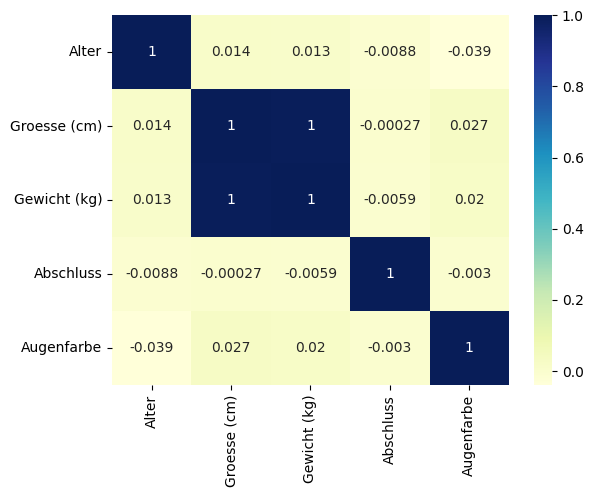

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

pearson = ohne_konstante_data.corr(method='pearson')

sns.heatmap(pearson, cmap="YlGnBu", annot=True)

In [23]:
# 4. Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest to select top 3 features based on ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=3)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]
print("Selected features:", selected_feature_names.tolist())
ohne_konstante_data = ohne_konstante_data[selected_feature_names]

Selected features: ['Groesse (cm)', 'Abschluss', 'Augenfarbe']


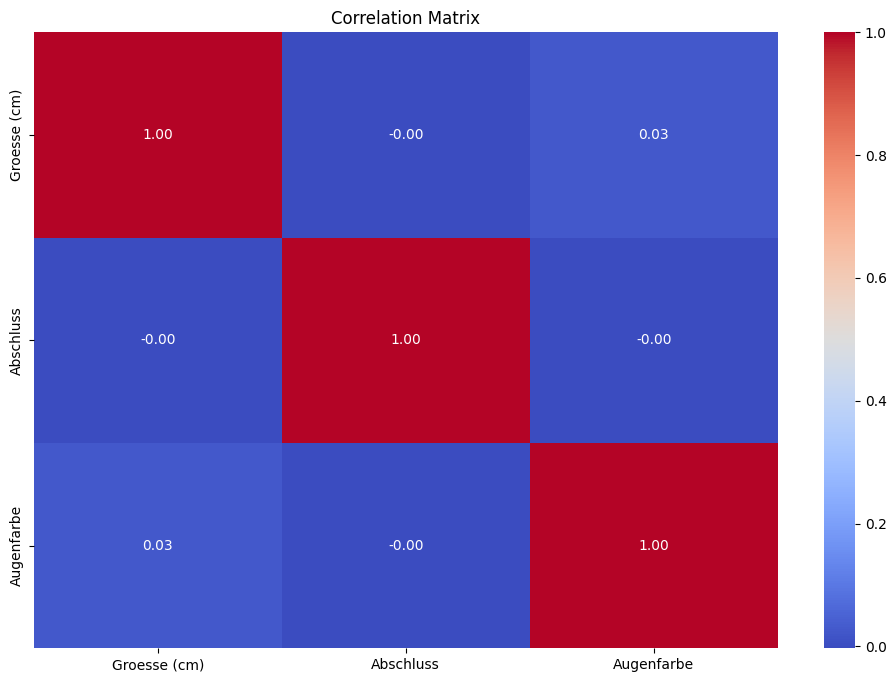

Highly Correlated Features (Threshold > 0.8): ['Groesse (cm)', 'Abschluss', 'Augenfarbe']


In [24]:
# Calculate the Pearson correlation matrix
correlation_matrix = ohne_konstante_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Select features with a high correlation threshold (e.g., > 0.8)
correlation_threshold = 0.8
high_correlation_features = correlation_matrix.columns[
    (correlation_matrix.abs() > correlation_threshold).any()
].tolist()

print("Highly Correlated Features (Threshold > 0.8):", high_correlation_features)

In [25]:
corr = ohne_konstante_data.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [26]:
selected_columns = ohne_konstante_data.columns[columns]
print(selected_columns.shape)
X = ohne_konstante_data[selected_columns]
X.head()

(3,)


,Groesse (cm),Abschluss,Augenfarbe
0,0.333333,0.8,0.000000
1,0.783333,0.0,1.000000
2,0.716667,0.4,0.666667
3,0.166667,0.8,1.000000
4,0.800000,1.0,0.666667


In [103]:
X.shape
y = y.astype(int)  # Convert y to integer classes for classification

In [104]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (800, 4)
Testing Features Shape: (200, 4)
Training Target Shape: (800,)
Testing Target Shape: (200,)


In [105]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [106]:
y.describe()

count    1000.000000
mean        0.128000
std         0.334257
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Einkommen, dtype: float64

In [107]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [108]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7


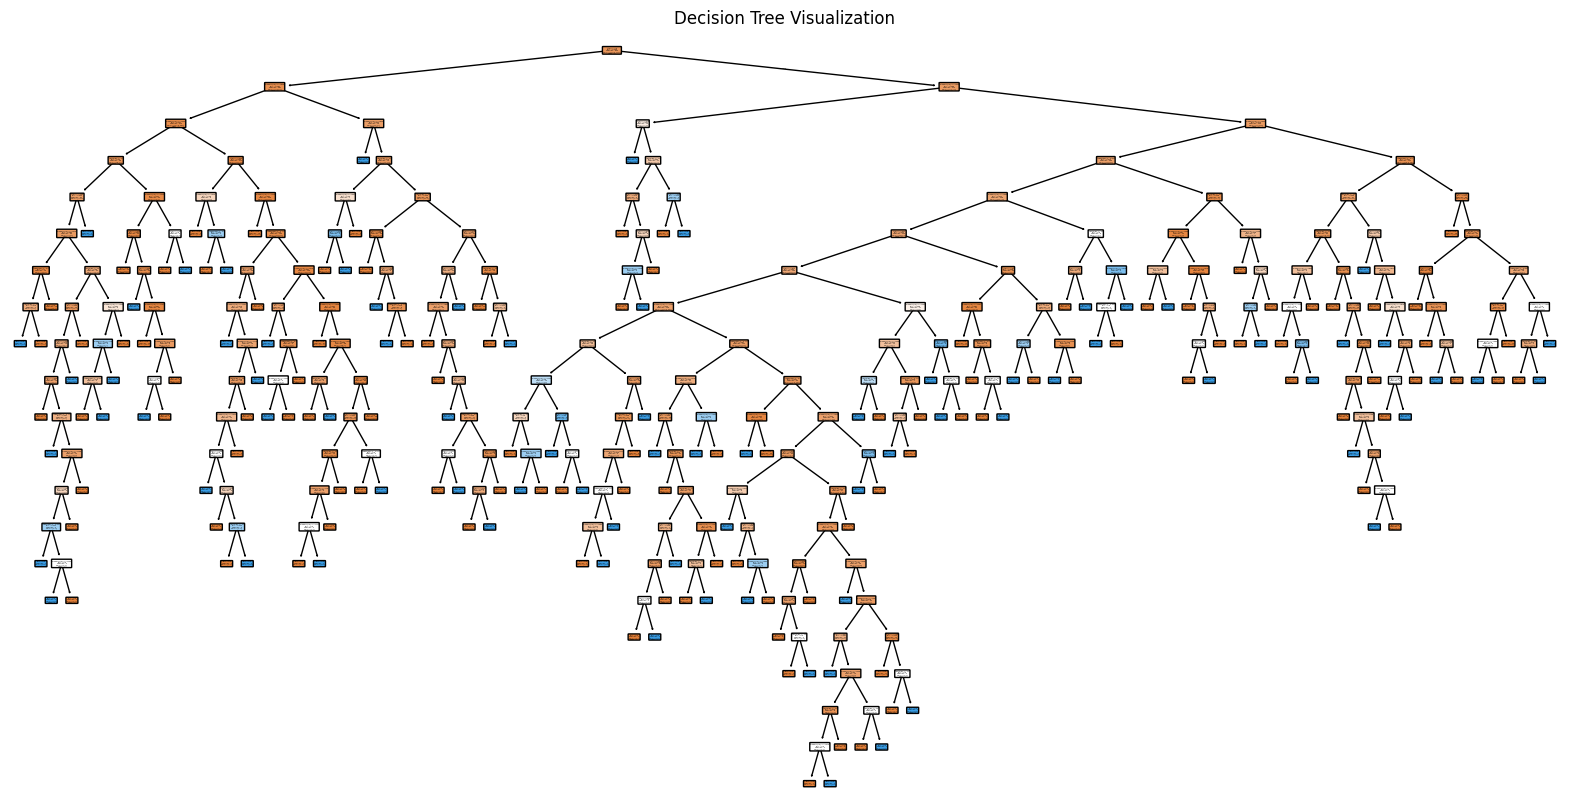

In [109]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=[str(cls) for cls in np.unique(y)], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [110]:
# Using the grid search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8537500000000001
